In [1]:
library(statnet)

Loading required package: tergm

Loading required package: ergm

Loading required package: network

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



ergm: version 3.11.0, created on 2020-10-14
Copyright (c) 2020, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. Goodreau, University of Washington
                    Pavel N. Krivitsky, UNSW Sydney
                    M

               Installed ReposVer Built  
EpiModel       "2.0.3"   "2.0.5"  "4.0.5"
ergm           "3.11.0"  "4.0.0"  "4.0.5"
network        "1.16.1"  "1.17.1" "4.0.5"
statnet.common "4.4.1"   "4.5.0"  "4.0.5"


Restart R and use "statnet::update_statnet()" to get the updates.



In [2]:
el = read.csv("../data/edgelist_2011.csv")

In [3]:
nl = read.csv("../data/nodelist_2011.csv")

In [4]:
nl$gdp_us_dollar <- log(nl$gdp_us_dollar)

In [5]:
net = network(el, directed = TRUE, matrix.type = 'edgelist', vertex.attr=nl, vertex.attrnames=colnames(nl), ignore.eval = FALSE, names.eval='trade')

In [6]:
set.edge.value(net, "trade", el$weight)

In [7]:
net

 Network attributes:
  vertices = 203 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 10361 
    missing edges= 0 
    non-missing edges= 10361 

 Vertex attribute names: 
    country_iso3 gdp_us_dollar vertex.names 

 Edge attribute names not shown 

In [26]:
model = ergm(net ~ edges +  mutual + nodeocov("gdp_us_dollar") + absdiff("gdp_us_dollar"))

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 0.314557452250294.

The log-likelihood improved by 2.831.

Iteration 2 of at most 20:

Optimizing with step length 0.205099740987058.

The log-likelihood improved by 2.272.

Iteration 3 of at most 20:

Optimizing with step length 0.323707138187438.

The log-likelihood improved by 3.358.

Iteration 4 of at most 20:

Optimizing with step length 0.41826990893019.

The log-likelihood improved by 2.535.

Iteration 5 of at most 20:

Optimizing with step length 0.890820994704246.

The log-likelihood improved by 3.772.

Iteration 6 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.5621.

Step length converged once. Increasing MCMC sample size.

Iteration 7 of at most 20:

Optimizing with step length 

In [27]:
summary(model)

Call:
ergm(formula = net ~ edges + mutual + nodeocov("gdp_us_dollar") + 
    absdiff("gdp_us_dollar"))

Iterations:  7 out of 20 

Monte Carlo MLE Results:
                        Estimate Std. Error MCMC % z value Pr(>|z|)    
edges                  -8.676889   0.135878      1  -63.86   <1e-04 ***
mutual                  0.626545   0.036772      0   17.04   <1e-04 ***
nodeocov.gdp_us_dollar  0.296225   0.005464      1   54.21   <1e-04 ***
absdiff.gdp_us_dollar   0.065767   0.005826      1   11.29   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 56846  on 41006  degrees of freedom
 Residual Deviance: 42085  on 41002  degrees of freedom
 
AIC: 42093    BIC: 42128    (Smaller is better.) 

In [28]:
gof <- gof(model ~ model + distance + odegree + idegree)

In [29]:
gof


Goodness-of-fit for model statistics 

                             obs       min      mean       max MC p-value
edges                   10359.00  10110.00  10365.89  10548.00       1.00
mutual                   1785.00   1680.00   1790.14   1878.00       0.86
nodeocov.gdp_us_dollar 261675.61 255533.00 261807.41 266384.86       0.94
absdiff.gdp_us_dollar   32269.26  31491.57  32319.90  33110.29       0.98

Goodness-of-fit for minimum geodesic distance 

      obs   min     mean   max MC p-value
1   10359 10110 10365.89 10548          1
2   21718 30380 30605.26 30866          0
3     849     8    34.85   213          0
Inf  8080     0     0.00     0          0

Goodness-of-fit for out-degree 

    obs min mean max MC p-value
0    40   0 0.00   0       0.00
1     1   0 0.00   0       0.00
2     2   0 0.00   0       0.00
3     1   0 0.01   1       0.02
5     1   0 0.03   1       0.06
6     1   0 0.06   1       0.12
7     0   0 0.12   1       1.00
8     1   0 0.28   2       0.52
9     0  

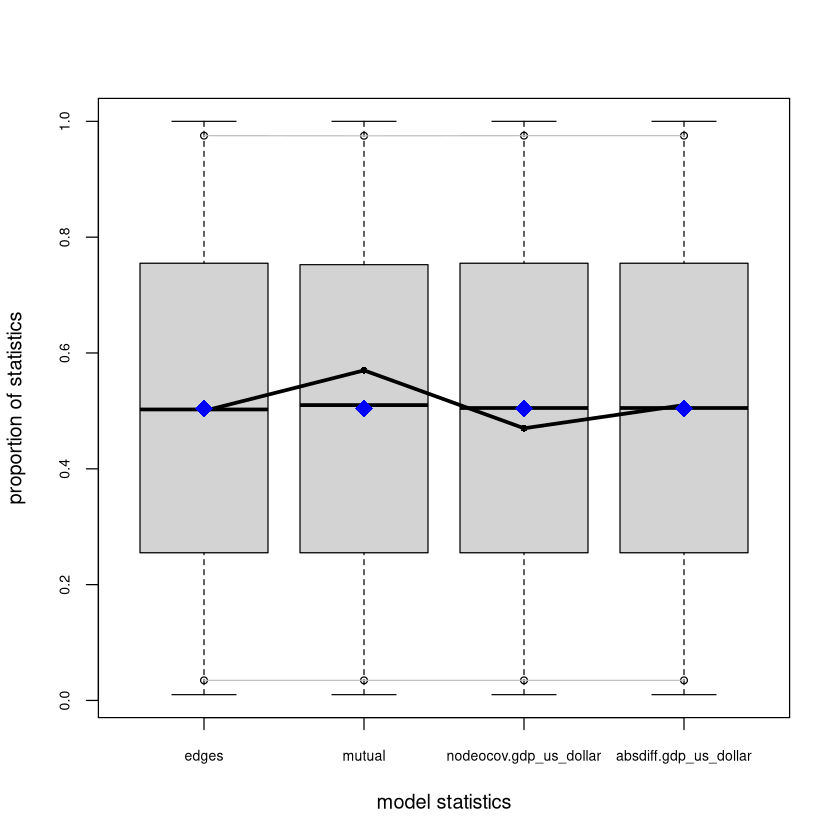

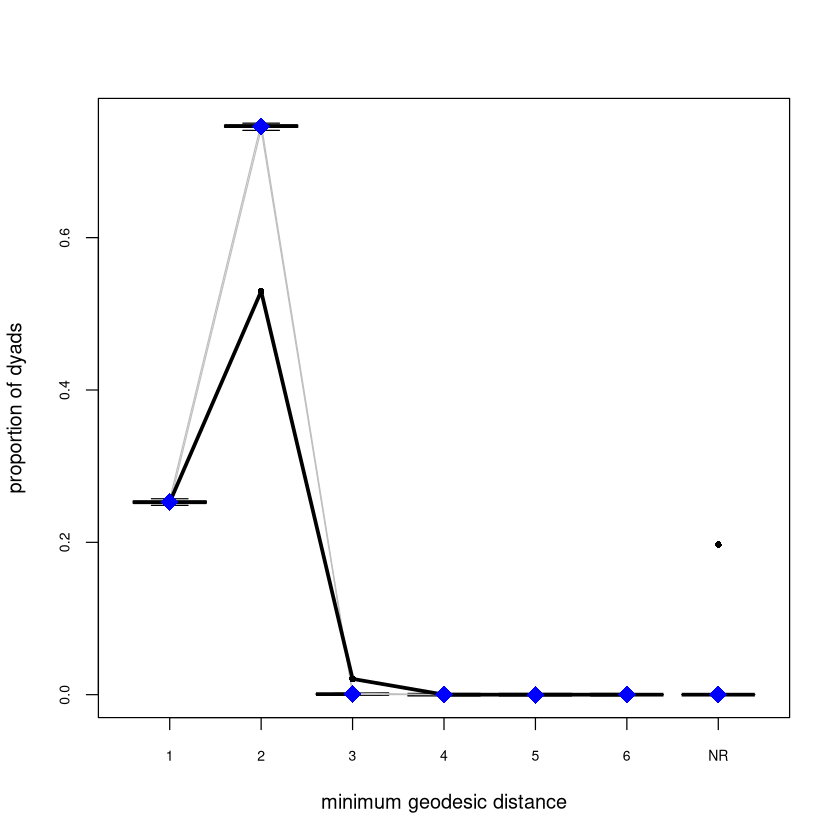

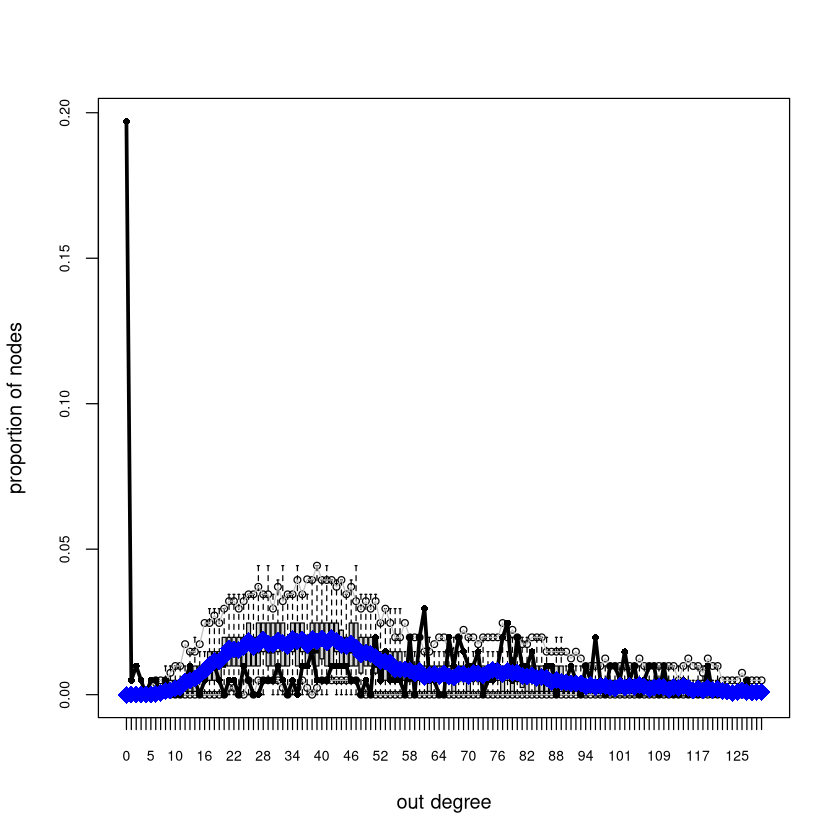

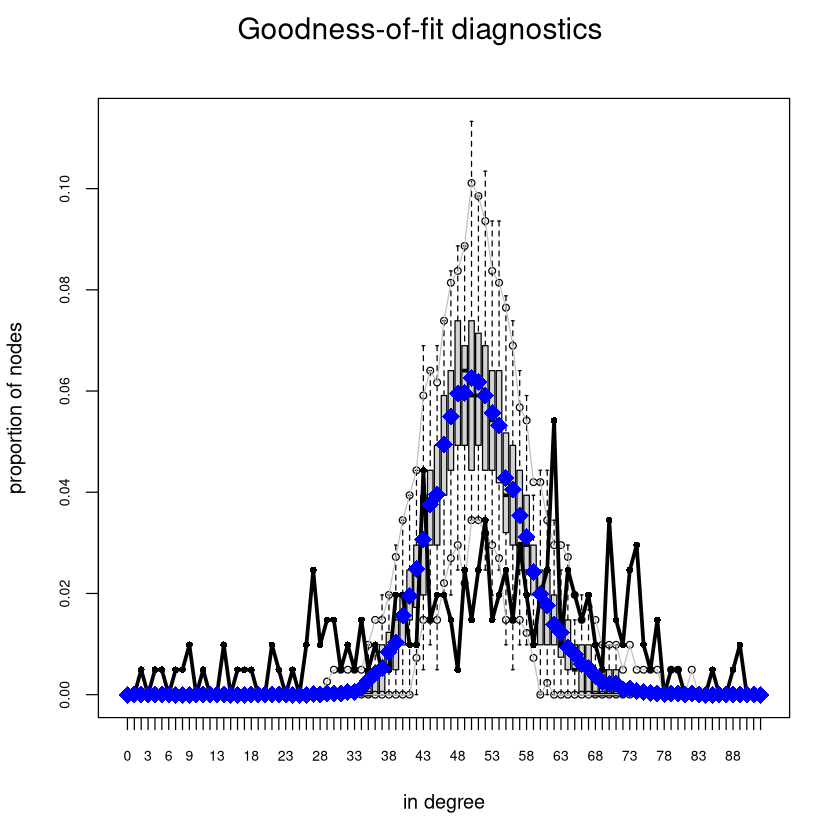

In [30]:
plot(gof)

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                            Mean      SD Naive SE Time-series SE
edges                    -4.1641   88.58   1.3841          9.547
mutual                   -0.8657   38.06   0.5946          3.492
nodeocov.gdp_us_dollar -119.8244 2184.04  34.1257        240.546
absdiff.gdp_us_dollar   -80.3920  307.68   4.8075         34.534

2. Quantiles for each variable:

                          2.5%     25%     50%    75%  97.5%
edges                   -177.0   -62.0   -4.00   56.0  177.0
mutual                   -81.0   -25.0    0.00   24.0   72.0
nodeocov.gdp_us_dollar -4360.0 -1560.7 -125.39 1355.8 4307.0
absdiff.gdp_us_dollar   -674.9  -269.9  -82.95  111.3  554.6


Sample statistics cross-correlations:
                           edges    mutual nodeocov.gdp_us_dollar

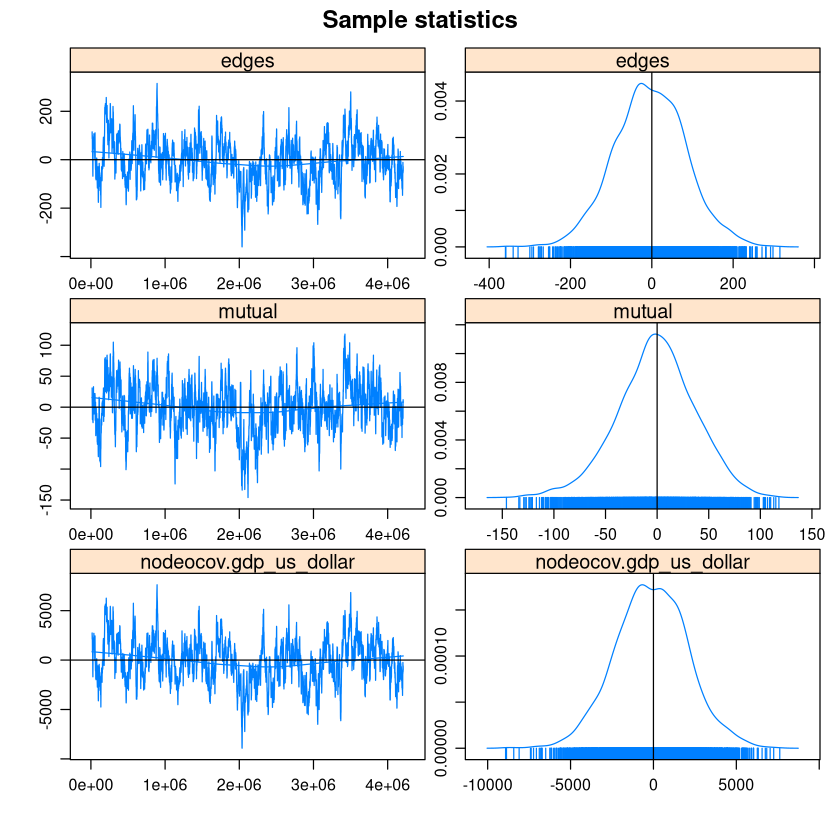


MCMC diagnostics shown here are from the last round of simulation, prior to computation of final parameter estimates. Because the final estimates are refinements of those used for this simulation run, these diagnostics may understate model performance. To directly assess the performance of the final model on in-model statistics, please use the GOF command: gof(ergmFitObject, GOF=~model).


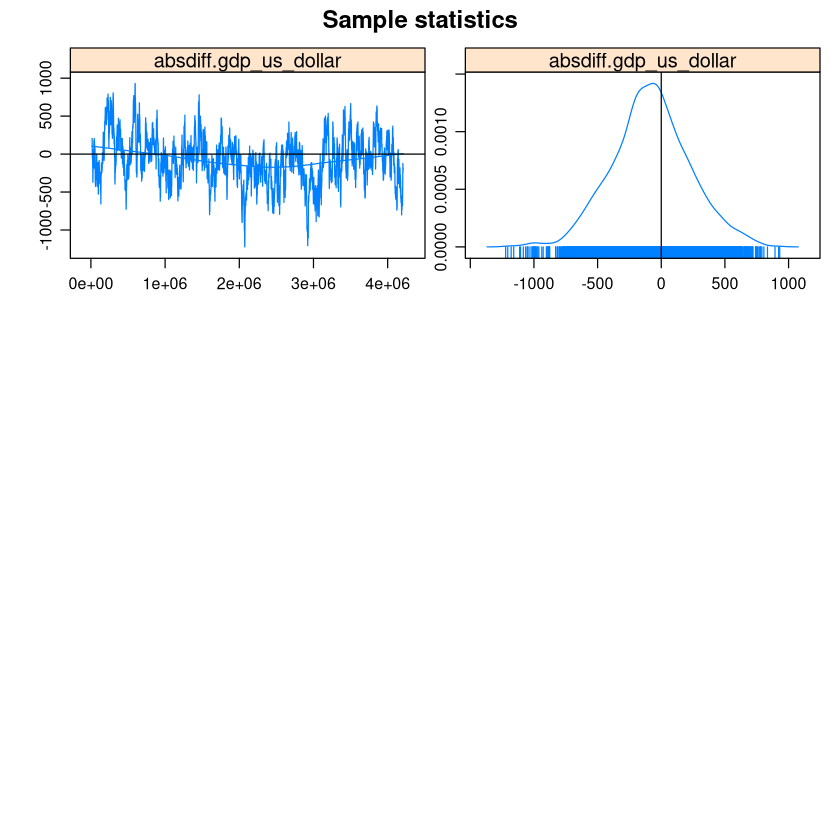

In [31]:
mcmc.diagnostics(model)